In [ ]:
#Before running (with "sudo R"):

install.packages("RPostgreSQL") #for connection to psql
install.packages("curl")   #for connection to geonode
install.packages("units")  #needed "sudo apt install libudunits2-dev" first
install.packages("gstat")
install.packages("remotes") #for installing packages from github
install.packages("rspatial") #remotes::install_github("rspatial/rspatial")
install.packages("sp")  #for reprojecting

In [3]:
#postgreSQLTable = ['ru_soil_moisture','bursa_soil_moisture','ugent_soil_moisture']

library(RPostgreSQL)
library(sp)
library(spData) #for example data

postgreSQLTable = "bursa_soil_moisture"
dsn_database    = "addferti_lorawan"    # Postgres databasename
dsn_hostname    = "127.0.0.1"  
dsn_port        = "5432"                
dsn_uid         = "postgres"            # Postgres username 
dsn_pwd         = "postgres"            # Postgres password 

tryCatch({
    drv <- dbDriver("PostgreSQL")
    print("Connecting to Database…")
    connec <- dbConnect(drv, 
                 dbname = dsn_database,
                 host = dsn_hostname, 
                 port = dsn_port,
                 user = dsn_uid, 
                 password = dsn_pwd)
    print("Database Connected!")
    },
    error=function(cond) {
            print("Unable to connect to Database.")
    })

SQL1 <- "SELECT DISTINCT ON (device_id) device_id, soil_temp, soil_mc, soil_ec, lat, long FROM"
SQL2 <- postgreSQLTable
SQL3 <- "ORDER BY device_id, recieved_at desc; " 
SQL <- paste(SQL1, SQL2, SQL3)
SQL

df <- dbGetQuery(connec, SQL)
df


dsp <- SpatialPoints(df[,6:5], proj4string=CRS("+proj=longlat + datum=WSG84"))
dsp <- SpatialPointsDataFrame(dsp, df)
#dsp
#spplot(dsp, 'soil_mc')

tk <- world

library(ggplot2)
ggplot(tk) +
  geom_sf() +
  geom_point(data = df, aes(x=long, y=lat)) +
  coord_sf(xlim = c(18, 38), ylim = c(30,50))

#plot(y = df$soil_mc, ylab='soil_mc', x = df$lat, type = 'p')

[1] "Connecting to Database…"
[1] "Database Connected!"


[1] "SELECT DISTINCT ON (device_id) device_id, soil_temp, soil_mc, soil_ec, lat, long FROM bursa_soil_moisture ORDER BY device_id, recieved_at desc; "

,device_id,soil_temp,soil_mc,soil_ec,lat,long
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,buu-lse-01,23.16,46.97,1571,40.13633,28.38297
2,buu-lse-02,24.73,20.74,552,40.13769,28.38388
3,buu-lse-03,23.14,7.37,132,40.13910,28.38262
4,buu-lse-04,23.48,28.81,502,40.13895,28.38326
5,buu-lse-06,24.60,21.46,698,40.13590,28.38435
6,buu-lse-09,18.66,22.09,382,40.13663,28.38332
7,buu-lse-10,18.58,25.34,475,40.13898,28.38375
8,buu-lse-12,18.55,24.01,466,40.13790,28.38355
9,buu-lse-14,22.98,32.98,3797,40.14046,28.38288


In [10]:
library(curl)
#library(rspatial)
library(sf)
library(ggplot2)

# Import data from geonode using CURL
h <- new_handle()
handle_setopt(h, VERBOSE = 1)         #libcurl doc: https://curl.se/libcurl/c/
handle_setopt(h, SSL_VERIFYPEER = 0)  # for insecure connections

URL1 <- "https://geoportal.addferti.eu/geoserver/ows"
URL2 <- "?service=WFS&version=1.0.0&request=GetFeature&typename=geonode%3ATurkey_Grid_2022"
URL3 <- "&outputFormat=json&srs=EPSG%3A32635"
URL  <- paste(URL1,URL2,URL3,sep="")
# Load the file.
req <- curl_fetch_memory(URL, handle = h)

# Also possible: Download the file:
curl_download(URL, handle = h, destfile = "Turkey_Grid_2022.json")

# Make the content better readable:
# jsonlite::prettify(rawToChar(req$content))

# read and write the data using sf 
sf_Polygon <- st_read("Turkey_Grid_2022.json")
# st_write(sf_Polygon, "output.shp", delete_layer = TRUE)

# silent alternatives:
 sf_Polygon <- read_sf("Turkey_Grid_2022.json")
 # write_sf(sf_Polygon, "Turkey_Grid_2022.shp", delete_layer = TRUE)



Reading layer `Turkey_Grid_2022' from data source 
  `/home/alex/Desktop/IrrigationMapCreation/Turkey_Grid_2022.json' 
  using driver `GeoJSON'
Simple feature collection with 3380 features and 2 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 617726.4 ymin: 4443644 xmax: 618006.8 ymax: 4444377
Projected CRS: WGS 84 / UTM zone 35N


Reading layer `Turkey_Grid_2022' from data source 
  `/home/alex/Desktop/IrrigationMapCreation/Turkey_Grid_2022.json' 
  using driver `GeoJSON'
Simple feature collection with 3380 features and 2 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 617726.4 ymin: 4443644 xmax: 618006.8 ymax: 4444377
Projected CRS: WGS 84 / UTM zone 35N


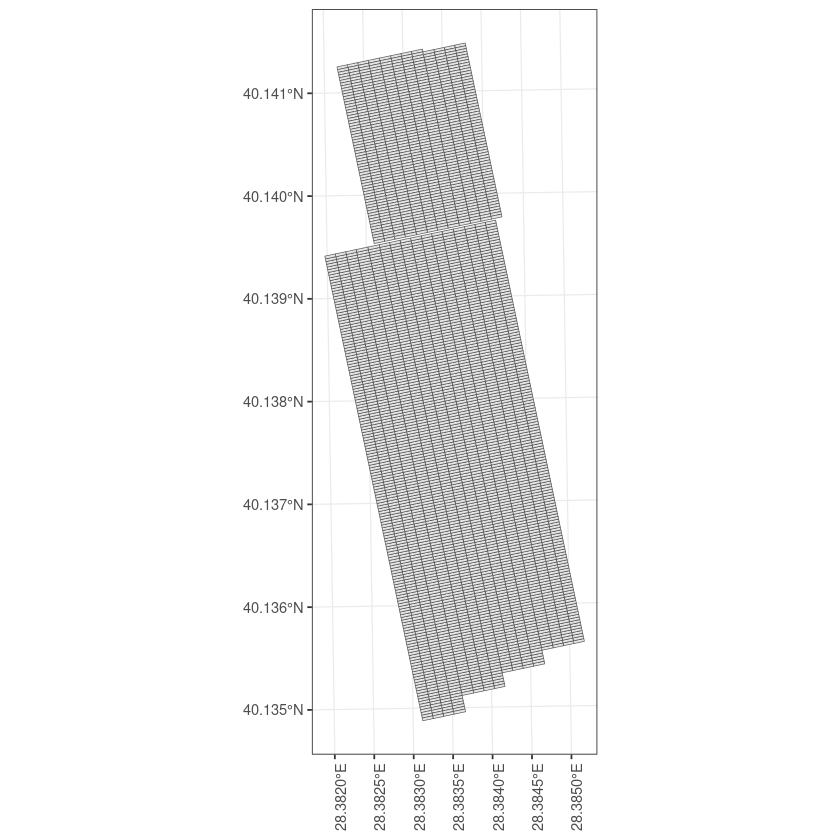

In [79]:
library(curl)
library(sf)
library(ggplot2)
library(rnaturalearth)

# Import data from geonode using CURL
h <- new_handle()
handle_setopt(h, VERBOSE = 1)         #libcurl doc: https://curl.se/libcurl/c/
handle_setopt(h, SSL_VERIFYPEER = 0)  # for insecure connections

URL1 <- "https://geoportal.addferti.eu/geoserver/ows"
URL2 <- "?service=WFS&version=1.0.0&request=GetFeature&typename=geonode%3ATurkey_Grid_2022"
URL3 <- "&outputFormat=json&srs=EPSG%3A32635"
URL  <- paste(URL1,URL2,URL3,sep="")

# Download the file.
curl_download(URL, handle = h, destfile = "Turkey_Grid_2022.json")

# read the data using sf 
sf_Polygon <- st_read("Turkey_Grid_2022.json")

ggplot() +
  geom_sf(data = sf_Polygon) +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90)) 